## Heberto Jimenez | IBM 


## Data Science Project

### [*LinkedIn*](https://www.linkedin.com/in/hebertojimenez)
### [*GitHub*](https://github.com/Hebjies/Tools)

<h1><center>Space X: Predicting Stage 2 Landing</center></h1>

![ChessUrl](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/lab_v2/images/crash.gif)

In [1]:
import requests
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
!pip install sqlalchemy==1.3.9
!pip install ibm_db_sa
!pip install ipython-sql

     |████████████████████████████████| 6.0 MB 24.8 MB/s eta 0:00:01
  Created wheel for sqlalchemy: filename=SQLAlchemy-1.3.9-cp39-cp39-linux_x86_64.whl size=1159949 sha256=dc5b5a04a2f1c591ac6281ea3e83fcf2fed8bbc434993612d0afaf36ea245613
  Stored in directory: /tmp/wsuser/.cache/pip/wheels/5b/43/0d/de1699809f9e6aaa54a97275298fa07075cb19acc557b18955
Successfully built sqlalchemy
  Attempting uninstall: sqlalchemy
    Found existing installation: SQLAlchemy 1.4.27
    Uninstalling SQLAlchemy-1.4.27:
      Successfully uninstalled SQLAlchemy-1.4.27
     |████████████████████████████████| 42 kB 3.4 MB/s  eta 0:00:01
  Created wheel for prettytable: filename=prettytable-0.7.2-py3-none-any.whl size=13714 sha256=22c2c7f77858c1921243cf713354ca0ef56a9704b14b41c7158b8577ac2882b1
  Stored in directory: /tmp/wsuser/.cache/pip/wheels/75/f7/28/77a076f1fa8cbeda61aca712815d04d7a32435f04a26a2dd7b
Successfully built prettytable


In [3]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

In [4]:
def getBoosterVersion(data):
    for x in data['rocket']:
        response = requests.get("https://api.spacexdata.com/v4/rockets/"+str(x)).json()
        BoosterVersion.append(response['name'])

In [5]:
def getLaunchSite(data):
    for x in data['launchpad']:
        response = requests.get("https://api.spacexdata.com/v4/launchpads/"+str(x)).json()
        Longitude.append(response['longitude'])
        Latitude.append(response['latitude'])
        LaunchSite.append(response['name'])

In [6]:
def getPayloadData(data):
    for load in data['payloads']:
        response = requests.get("https://api.spacexdata.com/v4/payloads/"+load).json()
        PayloadMass.append(response['mass_kg'])
        Orbit.append(response['orbit'])

In [7]:
def getCoreData(data):
    for core in data['cores']:
            if core['core'] != None:
                response = requests.get("https://api.spacexdata.com/v4/cores/"+core['core']).json()
                Block.append(response['block'])
                ReusedCount.append(response['reuse_count'])
                Serial.append(response['serial'])
            else:
                Block.append(None)
                ReusedCount.append(None)
                Serial.append(None)
            Outcome.append(str(core['landing_success'])+' '+str(core['landing_type']))
            Flights.append(core['flight'])
            GridFins.append(core['gridfins'])
            Reused.append(core['reused'])
            Legs.append(core['legs'])
            LandingPad.append(core['landpad'])

In [8]:
spacex_url="https://api.spacexdata.com/v4/launches/past"  # Original url information
response = requests.get(spacex_url) # We request the information
print(response.content[:800]) # We confirm we received the right data

b'[{"fairings":{"reused":false,"recovery_attempt":false,"recovered":false,"ships":[]},"links":{"patch":{"small":"https://images2.imgbox.com/3c/0e/T8iJcSN3_o.png","large":"https://images2.imgbox.com/40/e3/GypSkayF_o.png"},"reddit":{"campaign":null,"launch":null,"media":null,"recovery":null},"flickr":{"small":[],"original":[]},"presskit":null,"webcast":"https://www.youtube.com/watch?v=0a_00nJ_Y88","youtube_id":"0a_00nJ_Y88","article":"https://www.space.com/2196-spacex-inaugural-falcon-1-rocket-lost-launch.html","wikipedia":"https://en.wikipedia.org/wiki/DemoSat"},"static_fire_date_utc":"2006-03-17T00:00:00.000Z","static_fire_date_unix":1142553600,"net":false,"window":0,"rocket":"5e9d0d95eda69955f709d1eb","success":false,"failures":[{"time":33,"altitude":null,"reason":"merlin engine failure"}],'


In [9]:
static_json_url='https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/API_call_spacex_api.json' # Static response
response = requests.get(static_json_url) # We get again the information from this new url
print(response.content[:800]) # We confirm we received the right data

b'[{"fairings": {"reused": false, "recovery_attempt": false, "recovered": false, "ships": []}, "links": {"patch": {"small": "https://images2.imgbox.com/3c/0e/T8iJcSN3_o.png", "large": "https://images2.imgbox.com/40/e3/GypSkayF_o.png"}, "reddit": {"campaign": null, "launch": null, "media": null, "recovery": null}, "flickr": {"small": [], "original": []}, "presskit": null, "webcast": "https://www.youtube.com/watch?v=0a_00nJ_Y88", "youtube_id": "0a_00nJ_Y88", "article": "https://www.space.com/2196-spacex-inaugural-falcon-1-rocket-lost-launch.html", "wikipedia": "https://en.wikipedia.org/wiki/DemoSat"}, "static_fire_date_utc": "2006-03-17T00:00:00.000Z", "static_fire_date_unix": 1142553600, "tbd": false, "net": false, "window": 0, "rocket": "5e9d0d95eda69955f709d1eb", "success": false, "details"'


In [10]:
a = response.json() # Now we decode using json
df = pd.json_normalize(a) # An turn it to a data frame


df.head() # Data frame contains the information requested, however, this still "enconded", since the information does not mean anything by its own.

,static_fire_date_utc,static_fire_date_unix,tbd,net,window,rocket,success,details,crew,ships,capsules,payloads,launchpad,auto_update,failures,flight_number,name,date_utc,date_unix,date_local,date_precision,upcoming,cores,id,fairings.reused,fairings.recovery_attempt,fairings.recovered,fairings.ships,links.patch.small,links.patch.large,links.reddit.campaign,links.reddit.launch,links.reddit.media,links.reddit.recovery,links.flickr.small,links.flickr.original,links.presskit,links.webcast,links.youtube_id,links.article,links.wikipedia,fairings
0,2006-03-17T00:00:00.000Z,1.142554e+09,False,False,0.0,5e9d0d95eda69955f709d1eb,False,Engine failure at 33 seconds and loss of vehicle,[],[],[],[5eb0e4b5b6c3bb0006eeb1e1],5e9e4502f5090995de566f86,True,"[{'time': 33, 'altitude': None, 'reason': 'merlin engine failure'}]",1,FalconSat,2006-03-24T22:30:00.000Z,1143239400,2006-03-25T10:30:00+12:00,hour,False,"[{'core': '5e9e289df35918033d3b2623', 'flight': 1, 'gridfins': False, 'legs': False, 'reused': False, 'landing_attempt': False, 'landing_success': None, 'landing_type': None, 'landpad': None}]",5eb87cd9ffd86e000604b32a,False,False,False,[],https://images2.imgbox.com/3c/0e/T8iJcSN3_o.png,https://images2.imgbox.com/40/e3/GypSkayF_o.png,None,None,None,None,[],[],None,https://www.youtube.com/watch?v=0a_00nJ_Y88,0a_00nJ_Y88,https://www.space.com/2196-spacex-inaugural-falcon-1-rocket-lost-launch.html,https://en.wikipedia.org/wiki/DemoSat,NaN
1,None,NaN,False,False,0.0,5e9d0d95eda69955f709d1eb,False,"Successful first stage burn and transition to second stage, maximum altitude 289 km, Premature engine shutdown at T+7 min 30 s, Failed to reach orbit, Failed to recover first stage",[],[],[],[5eb0e4b6b6c3bb0006eeb1e2],5e9e4502f5090995de566f86,True,"[{'time': 301, 'altitude': 289, 'reason': 'harmonic oscillation leading to premature engine shutdown'}]",2,DemoSat,2007-03-21T01:10:00.000Z,1174439400,2007-03-21T13:10:00+12:00,hour,False,"[{'core': '5e9e289ef35918416a3b2624', 'flight': 1, 'gridfins': False, 'legs': False, 'reused': False, 'landing_attempt': False, 'landing_success': None, 'landing_type': None, 'landpad': None}]",5eb87cdaffd86e000604b32b,False,False,False,[],https://images2.imgbox.com/4f/e3/I0lkuJ2e_o.png,https://images2.imgbox.com/be/e7/iNqsqVYM_o.png,None,None,None,None,[],[],None,https://www.youtube.com/watch?v=Lk4zQ2wP-Nc,Lk4zQ2wP-Nc,https://www.space.com/3590-spacex-falcon-1-rocket-fails-reach-orbit.html,https://en.wikipedia.org/wiki/DemoSat,NaN
2,None,NaN,False,False,0.0,5e9d0d95eda69955f709d1eb,False,Residual stage 1 thrust led to collision between stage 1 and stage 2,[],[],[],"[5eb0e4b6b6c3bb0006eeb1e3, 5eb0e4b6b6c3bb0006eeb1e4]",5e9e4502f5090995de566f86,True,"[{'time': 140, 'altitude': 35, 'reason': 'residual stage-1 thrust led to collision between stage 1 and stage 2'}]",3,Trailblazer,2008-08-03T03:34:00.000Z,1217734440,2008-08-03T15:34:00+12:00,hour,False,"[{'core': '5e9e289ef3591814873b2625', 'flight': 1, 'gridfins': False, 'legs': False, 'reused': False, 'landing_attempt': False, 'landing_success': None, 'landing_type': None, 'landpad': None}]",5eb87cdbffd86e000604b32c,False,False,False,[],https://images2.imgbox.com/3d/86/cnu0pan8_o.png,https://images2.imgbox.com/4b/bd/d8UxLh4q_o.png,None,None,None,None,[],[],None,https://www.youtube.com/watch?v=v0w9p3U8860,v0w9p3U8860,http://www.spacex.com/news/2013/02/11/falcon-1-flight-3-mission-summary,https://en.wikipedia.org/wiki/Trailblazer_(satellite),NaN
3,2008-09-20T00:00:00.000Z,1.221869e+09,False,False,0.0,5e9d0d95eda69955f709d1eb,True,"Ratsat was carried to orbit on the first successful orbital launch of any privately funded and developed, liquid-propelled carrier rocket, the SpaceX Falcon 1",[],[],[],[5eb0e4b7b6c3bb0006eeb1e5],5e9e4502f5090995de566f86,True,[],4,RatSat,2008-09-28T23:15:00.000Z,1222643700,2008-09-28T11:15:00+12:00,hour,False,"[{'core': '5e9e289ef3591855dc3b2626', 'flight': 1, 'gridfins': False, 'legs': False, 'reused': False, 'landing_attempt': False, 'landing_succes

In [11]:
sum_df = df[['rocket', 'payloads', 'launchpad', 'cores', 'flight_number', 'date_utc']]
sum_df = sum_df[sum_df['cores'].map(len)==1]
sum_df = sum_df[sum_df['payloads'].map(len)==1]

sum_df['cores'] = sum_df['cores'].map(lambda x : x[0])
sum_df['payloads'] = sum_df['payloads'].map(lambda x : x[0])
sum_df['date'] = pd.to_datetime(sum_df['date_utc']).dt.date
sum_df.head()

,rocket,payloads,launchpad,cores,flight_number,date_utc,date
0,5e9d0d95eda69955f709d1eb,5eb0e4b5b6c3bb0006eeb1e1,5e9e4502f5090995de566f86,"{'core': '5e9e289df35918033d3b2623', 'flight': 1, 'gridfins': False, 'legs': False, 'reused': False, 'landing_attempt': False, 'landing_success': None, 'landing_type': None, 'landpad': None}",1,2006-03-24T22:30:00.000Z,2006-03-24
1,5e9d0d95eda69955f709d1eb,5eb0e4b6b6c3bb0006eeb1e2,5e9e4502f5090995de566f86,"{'core': '5e9e289ef35918416a3b2624', 'flight': 1, 'gridfins': False, 'legs': False, 'reused': False, 'landing_attempt': False, 'landing_success': None, 'landing_type': None, 'landpad': None}",2,2007-03-21T01:10:00.000Z,2007-03-21
3,5e9d0d95eda69955f709d1eb,5eb0e4b7b6c3bb0006eeb1e5,5e9e4502f5090995de566f86,"{'core': '5e9e289ef3591855dc3b2626', 'flight': 1, 'gridfins': False, 'legs': False, 'reused': False, 'landing_attempt': False, 'landing_success': None, 'landing_type': None, 'landpad': None}",4,2008-09-28T23:15:00.000Z,2008-09-28
4,5e9d0d95eda69955f709d1eb,5eb0e4b7b6c3bb0006eeb1e6,5e9e4502f5090995de566f86,"{'core': '5e9e289ef359184f103b2627', 'flight': 1, 'gridfins': False, 'legs': False, 'reused': False, 'landing_attempt': False, 'landing_success': None, 'landing_type': None, 'landpad': None}",5,2009-07-13T03:35:00.000Z,2009-07-13
5,5e9d0d95eda69973a809d1ec,5eb0e4b7b6c3bb0006eeb1e7,5e9e4501f509094ba4566f84,"{'core': '5e9e289ef359185f2b3b2628', 'flight': 1, 'gridfins': False, 'legs': False, 'reused': False, 'landing_attempt': False, 'landing_success': None, 'landing_type': None, 'landpad': None}",6,2010-06-04T18:45:00.000Z,2010-06-04


In [12]:
#Global variables 
BoosterVersion = []
PayloadMass = []
Orbit = []
LaunchSite = []
Outcome = []
Flights = []
GridFins = []
Reused = []
Legs = []
LandingPad = []
Block = []
ReusedCount = []
Serial = []
Longitude = []
Latitude = []

In [13]:
BoosterVersion
getBoosterVersion(sum_df)
BoosterVersion[0:5]

['Falcon 1', 'Falcon 1', 'Falcon 1', 'Falcon 1', 'Falcon 9']

In [14]:
getLaunchSite(sum_df)
getPayloadData(sum_df)
getCoreData(sum_df)

In [15]:
launch_dict = {'FlightNumber': list(sum_df['flight_number']),
'Date': list(sum_df['date']),
'BoosterVersion':BoosterVersion,
'PayloadMass':PayloadMass,
'Orbit':Orbit,
'LaunchSite':LaunchSite,
'Outcome':Outcome,
'Flights':Flights,
'GridFins':GridFins,
'Reused':Reused,
'Legs':Legs,
'LandingPad':LandingPad,
'Block':Block,
'ReusedCount':ReusedCount,
'Serial':Serial,
'Longitude': Longitude,
'Latitude': Latitude}


In [16]:
launch_df = pd.DataFrame.from_dict(launch_dict, orient = "index") # from the dictionary, we create our dataframe, using keys as rows to macth length
launch_df = launch_df.transpose() # We transpose "back" data frame, so keys are columns
launch_df.head() # We check the data frame

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude
0,1,2006-03-24,Falcon 1,20,LEO,Kwajalein Atoll,None None,1,False,False,False,None,None,0,Merlin1A,167.743129,9.047721
1,2,2007-03-21,Falcon 1,None,LEO,Kwajalein Atoll,None None,1,False,False,False,None,None,0,Merlin2A,167.743129,9.047721
2,4,2008-09-28,Falcon 1,165,LEO,Kwajalein Atoll,None None,1,False,False,False,None,None,0,Merlin2C,167.743129,9.047721
3,5,2009-07-13,Falcon 1,200,LEO,Kwajalein Atoll,None None,1,False,False,False,None,None,0,Merlin3C,167.743129,9.047721
4,6,2010-06-04,Falcon 9,None,LEO,CCSFS SLC 40,None None,1,False,False,False,None,1,0,B0003,-80.577366,28.561857


In [17]:
launch_df.drop(launch_df[launch_df['BoosterVersion']=='Falcon 1'].index, inplace = True)
launch_df.head()

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude
4,6,2010-06-04,Falcon 9,None,LEO,CCSFS SLC 40,None None,1,False,False,False,None,1,0,B0003,-80.577366,28.561857
5,8,2012-05-22,Falcon 9,525,LEO,CCSFS SLC 40,None None,1,False,False,False,None,1,0,B0005,-80.577366,28.561857
6,10,2013-03-01,Falcon 9,677,ISS,CCSFS SLC 40,None None,1,False,False,False,None,1,0,B0007,-80.577366,28.561857
7,11,2013-09-29,Falcon 9,500,PO,VAFB SLC 4E,False Ocean,1,False,False,False,None,1,0,B1003,-120.610829,34.632093
8,12,2013-12-03,Falcon 9,3170,GTO,CCSFS SLC 40,None None,1,False,False,False,None,1,0,B1004,-80.577366,28.561857


In [18]:
launch_df.loc[:,'FlightNumber'] = list(range(1, launch_df.shape[0]+1))

In [19]:
launch_df = launch_df.drop([94])

In [20]:
m = launch_df["PayloadMass"].mean()
launch_df.PayloadMass.fillna(value=np.nan, inplace = True)
launch_df["PayloadMass"] = launch_df["PayloadMass"].replace(np.nan,m)

In [21]:
launch_df.LandingPad.fillna(value=np.nan, inplace = True)

In [22]:
launch_df.head()

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude
4,1,2010-06-04,Falcon 9,6123.547647,LEO,CCSFS SLC 40,None None,1,False,False,False,NaN,1,0,B0003,-80.577366,28.561857
5,2,2012-05-22,Falcon 9,525.000000,LEO,CCSFS SLC 40,None None,1,False,False,False,NaN,1,0,B0005,-80.577366,28.561857
6,3,2013-03-01,Falcon 9,677.000000,ISS,CCSFS SLC 40,None None,1,False,False,False,NaN,1,0,B0007,-80.577366,28.561857
7,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1,0,B1003,-120.610829,34.632093
8,5,2013-12-03,Falcon 9,3170.000000,GTO,CCSFS SLC 40,None None,1,False,False,False,NaN,1,0,B1004,-80.577366,28.561857


In [23]:
launch_df.isnull().sum()/launch_df.count()*100

FlightNumber       0.000
Date               0.000
BoosterVersion     0.000
PayloadMass        0.000
Orbit              0.000
LaunchSite         0.000
Outcome            0.000
Flights            0.000
GridFins           0.000
Reused             0.000
Legs               0.000
LandingPad        40.625
Block              0.000
ReusedCount        0.000
Serial             0.000
Longitude          0.000
Latitude           0.000
dtype: float64

In [24]:
launch_df.dtypes

FlightNumber        int64
Date               object
BoosterVersion     object
PayloadMass       float64
Orbit              object
LaunchSite         object
Outcome            object
Flights            object
GridFins           object
Reused             object
Legs               object
LandingPad         object
Block              object
ReusedCount        object
Serial             object
Longitude          object
Latitude           object
dtype: object

In [25]:
launch_df.LaunchSite.value_counts()

CCSFS SLC 40    55
KSC LC 39A      22
VAFB SLC 4E     13
Name: LaunchSite, dtype: int64

In [26]:
launch_df.Orbit.value_counts()

GTO      27
ISS      21
VLEO     14
PO        9
LEO       7
SSO       5
MEO       3
ES-L1     1
HEO       1
SO        1
GEO       1
Name: Orbit, dtype: int64

In [27]:
landing_outcomes = launch_df.Outcome.value_counts()
landing_outcomes

True ASDS      41
None None      19
True RTLS      14
False ASDS      6
True Ocean      5
False Ocean     2
None ASDS       2
False RTLS      1
Name: Outcome, dtype: int64

In [28]:
for i,outcome in enumerate(landing_outcomes.keys()):
    print(i,outcome)

0 True ASDS
1 None None
2 True RTLS
3 False ASDS
4 True Ocean
5 False Ocean
6 None ASDS
7 False RTLS


In [29]:
bad_outcomes=set(landing_outcomes.keys()[[1,3,5,6,7]])
bad_outcomes

{'False ASDS', 'False Ocean', 'False RTLS', 'None ASDS', 'None None'}

In [30]:
landing_class = []
for i in range(launch_df.Outcome.size):
    if launch_df["Outcome"].iloc[i] in bad_outcomes:
        landing_class.append(0)
    else:
        landing_class.append(1)

In [31]:
launch_df['Class']=landing_class
launch_df.Class.value_counts()


1    60
0    30
Name: Class, dtype: int64

In [32]:
launch_df.to_csv('Launches.csv')

## SQL Data Base Connection

In [33]:
%load_ext sql

In [35]:
%sql ibm_db_sa://zqj34403:xAGxVyFunseLxxfT@6667d8e9-9d4d-4ccb-ba32-21da3bb5aafc.c1ogj3sd0tgtu0lqde00.databases.appdomain.cloud:30376/bludb?security=SSL

In [36]:
%%sql

SELECT DISTINCT LAUNCH_SITE FROM LAUNCHES

 * ibm_db_sa://zqj34403:***@6667d8e9-9d4d-4ccb-ba32-21da3bb5aafc.c1ogj3sd0tgtu0lqde00.databases.appdomain.cloud:30376/bludb
Done.


launch_site
CCAFS LC-40
CCAFS SLC-40
KSC LC-39A
VAFB SLC-4E


In [37]:
%%sql

SELECT * FROM LAUNCHES
WHERE LAUNCH_SITE LIKE 'CCA%' LIMIT 5

 * ibm_db_sa://zqj34403:***@6667d8e9-9d4d-4ccb-ba32-21da3bb5aafc.c1ogj3sd0tgtu0lqde00.databases.appdomain.cloud:30376/bludb
Done.


DATE,time__utc_,booster_version,launch_site,payload,payload_mass__kg_,orbit,customer,mission_outcome,landing__outcome
2010-06-04,18:45:00,F9 v1.0 B0003,CCAFS LC-40,Dragon Spacecraft Qualification Unit,0,LEO,SpaceX,Success,Failure (parachute)
2010-12-08,15:43:00,F9 v1.0 B0004,CCAFS LC-40,"Dragon demo flight C1, two CubeSats, barrel of Brouere cheese",0,LEO (ISS),NASA (COTS) NRO,Success,Failure (parachute)
2012-05-22,07:44:00,F9 v1.0 B0005,CCAFS LC-40,Dragon demo flight C2,525,LEO (ISS),NASA (COTS),Success,No attempt
2012-10-08,00:35:00,F9 v1.0 B0006,CCAFS LC-40,SpaceX CRS-1,500,LEO (ISS),NASA (CRS),Success,No attempt
2013-03-01,15:10:00,F9 v1.0 B0007,CCAFS LC-40,SpaceX CRS-2,677,LEO (ISS),NASA (CRS),Success,No attempt


In [38]:
%%sql

SELECT SUM(PAYLOAD_MASS__KG_) FROM LAUNCHES
WHERE CUSTOMER = 'NASA (CRS)'

 * ibm_db_sa://zqj34403:***@6667d8e9-9d4d-4ccb-ba32-21da3bb5aafc.c1ogj3sd0tgtu0lqde00.databases.appdomain.cloud:30376/bludb
Done.


1
45596


In [39]:
%%sql
SELECT SUM(PAYLOAD_MASS__KG_) FROM LAUNCHES
WHERE BOOSTER_VERSION LIKE '%F9 v1.1'

 * ibm_db_sa://zqj34403:***@6667d8e9-9d4d-4ccb-ba32-21da3bb5aafc.c1ogj3sd0tgtu0lqde00.databases.appdomain.cloud:30376/bludb
Done.


1
14642


In [40]:
%%sql
SELECT DATE AS FIRST_LANDED_DRONE FROM LAUNCHES
WHERE LANDING__OUTCOME = 'Success (ground pad)' LIMIT 1

 * ibm_db_sa://zqj34403:***@6667d8e9-9d4d-4ccb-ba32-21da3bb5aafc.c1ogj3sd0tgtu0lqde00.databases.appdomain.cloud:30376/bludb
Done.


first_landed_drone
2015-12-22


In [41]:
%%sql 

SELECT BOOSTER_VERSION AS DRONE_SUCCESS_4000_6000 FROM LAUNCHES
WHERE LANDING__OUTCOME = 'Success (drone ship)' AND 
PAYLOAD_MASS__KG_ > 4000 AND PAYLOAD_MASS__KG_ < 6000

 * ibm_db_sa://zqj34403:***@6667d8e9-9d4d-4ccb-ba32-21da3bb5aafc.c1ogj3sd0tgtu0lqde00.databases.appdomain.cloud:30376/bludb
Done.


drone_success_4000_6000
F9 FT B1022
F9 FT B1026
F9 FT B1021.2
F9 FT B1031.2


In [42]:
%%sql 

SELECT COUNT(MISSION_OUTCOME) AS Successfully_Missions FROM LAUNCHES
WHERE MISSION_OUTCOME = 'Success'

 * ibm_db_sa://zqj34403:***@6667d8e9-9d4d-4ccb-ba32-21da3bb5aafc.c1ogj3sd0tgtu0lqde00.databases.appdomain.cloud:30376/bludb
Done.


successfully_missions
99


In [43]:
%%sql 

SELECT COUNT(MISSION_OUTCOME) AS Failed_Missions FROM LAUNCHES 
WHERE MISSION_OUTCOME <> 'Success'

 * ibm_db_sa://zqj34403:***@6667d8e9-9d4d-4ccb-ba32-21da3bb5aafc.c1ogj3sd0tgtu0lqde00.databases.appdomain.cloud:30376/bludb
Done.


failed_missions
2


In [44]:
%%sql

SELECT BOOSTER_VERSION AS MAX_PAYLOAD, PAYLOAD_MASS__KG_ AS MAX_MASS FROM LAUNCHES
WHERE PAYLOAD_MASS__KG_ = (SELECT MAX(PAYLOAD_MASS__KG_) FROM LAUNCHES)

 * ibm_db_sa://zqj34403:***@6667d8e9-9d4d-4ccb-ba32-21da3bb5aafc.c1ogj3sd0tgtu0lqde00.databases.appdomain.cloud:30376/bludb
Done.


max_payload,max_mass
F9 B5 B1048.4,15600
F9 B5 B1049.4,15600
F9 B5 B1051.3,15600
F9 B5 B1056.4,15600
F9 B5 B1048.5,15600
F9 B5 B1051.4,15600
F9 B5 B1049.5,15600
F9 B5 B1060.2,15600
F9 B5 B1058.3,15600
F9 B5 B1051.6,15600


In [45]:
%%sql 

SELECT BOOSTER_VERSION AS BOOSTER_F_2015, LAUNCH_SITE AS STIE_F_2015 FROM LAUNCHES
WHERE LANDING__OUTCOME = 'Failure (drone ship)' AND
YEAR(DATE)  = 2015

 * ibm_db_sa://zqj34403:***@6667d8e9-9d4d-4ccb-ba32-21da3bb5aafc.c1ogj3sd0tgtu0lqde00.databases.appdomain.cloud:30376/bludb
Done.


booster_f_2015,stie_f_2015
F9 v1.1 B1012,CCAFS LC-40
F9 v1.1 B1015,CCAFS LC-40


In [46]:
%%sql 

SELECT COUNT(LANDING__OUTCOME) AS COUNT_OF_L, LANDING__OUTCOME AS OUTCOME FROM LAUNCHES
WHERE DATE > '2010-06-04' AND 
DATE < '2017-03-20'
GROUP BY LANDING__OUTCOME
ORDER BY COUNT(LANDING__OUTCOME) DESC

 * ibm_db_sa://zqj34403:***@6667d8e9-9d4d-4ccb-ba32-21da3bb5aafc.c1ogj3sd0tgtu0lqde00.databases.appdomain.cloud:30376/bludb
Done.


count_of_l,outcome
10,No attempt
5,Failure (drone ship)
5,Success (drone ship)
3,Controlled (ocean)
3,Success (ground pad)
2,Uncontrolled (ocean)
1,Failure (parachute)
1,Precluded (drone ship)


In [47]:
launch_df.head()

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
4,1,2010-06-04,Falcon 9,6123.547647,LEO,CCSFS SLC 40,None None,1,False,False,False,NaN,1,0,B0003,-80.577366,28.561857,0
5,2,2012-05-22,Falcon 9,525.000000,LEO,CCSFS SLC 40,None None,1,False,False,False,NaN,1,0,B0005,-80.577366,28.561857,0
6,3,2013-03-01,Falcon 9,677.000000,ISS,CCSFS SLC 40,None None,1,False,False,False,NaN,1,0,B0007,-80.577366,28.561857,0
7,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1,0,B1003,-120.610829,34.632093,0
8,5,2013-12-03,Falcon 9,3170.000000,GTO,CCSFS SLC 40,None None,1,False,False,False,NaN,1,0,B1004,-80.577366,28.561857,0


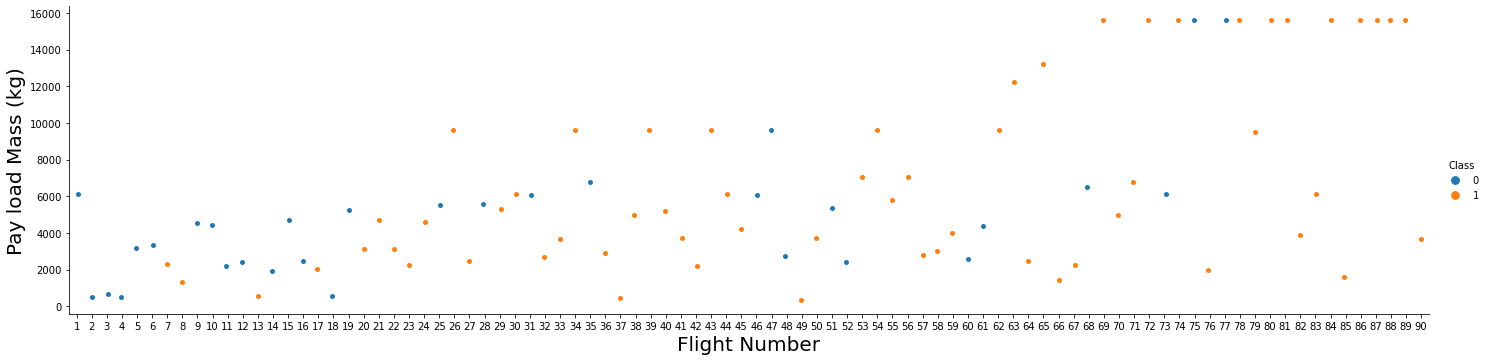

In [48]:
sns.catplot(y="PayloadMass", x="FlightNumber", hue="Class", data=launch_df, aspect = 4)
plt.xlabel("Flight Number",fontsize=20)
plt.ylabel("Pay load Mass (kg)",fontsize=20)
plt.show()

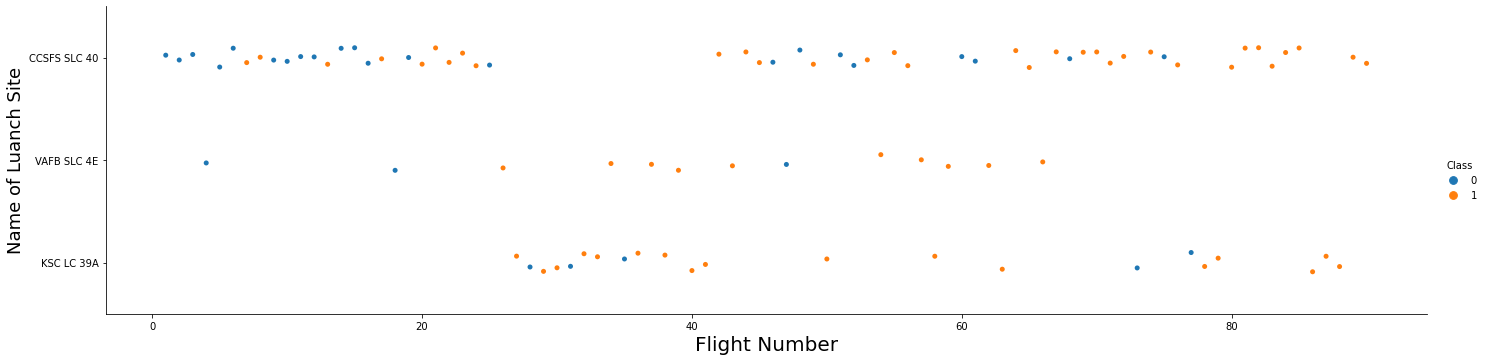

In [49]:
sns.catplot(y="LaunchSite", x="FlightNumber", hue="Class", data=launch_df, aspect = 4)
plt.xlabel("Flight Number",fontsize=20)
plt.ylabel("Name of Luanch Site",fontsize=18)
plt.show()

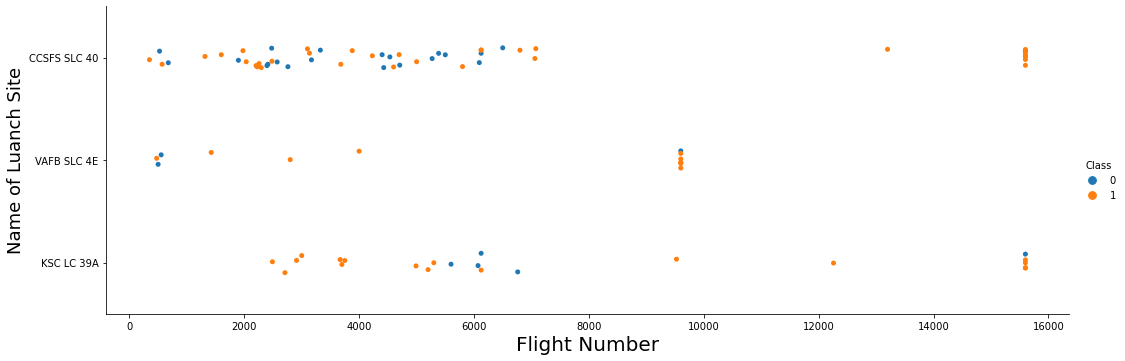

In [50]:
sns.catplot(y="LaunchSite", x="PayloadMass", hue="Class", data=launch_df, aspect = 3)
plt.xlabel("Flight Number",fontsize=20)
plt.ylabel("Name of Luanch Site",fontsize=18)
plt.show()

In [51]:
Orbit = launch_df.groupby('Orbit').mean()
Orbit['Orbit'] = Orbit.index
Orbit.head()

,FlightNumber,PayloadMass,Class,Orbit
Orbit,,,,
ES-L1,13.000000,570.000000,1.000000,ES-L1
GEO,83.000000,6123.547647,1.000000,GEO
GTO,35.037037,5011.994444,0.518519,GTO
HEO,49.000000,350.000000,1.000000,HEO
ISS,39.142857,3279.938095,0.619048,ISS


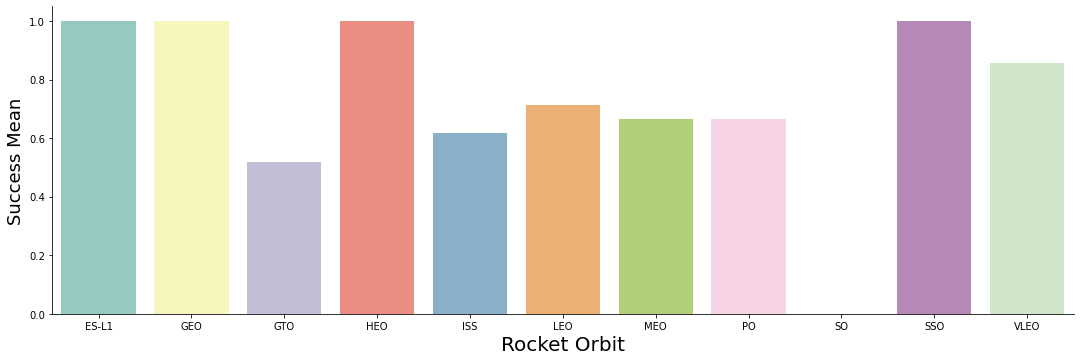

In [52]:
sns.catplot(y="Class", x="Orbit", data= Orbit, kind="bar",palette="Set3", aspect = 3)
plt.xlabel("Rocket Orbit",fontsize=20)
plt.ylabel("Success Mean",fontsize=18)
plt.show()

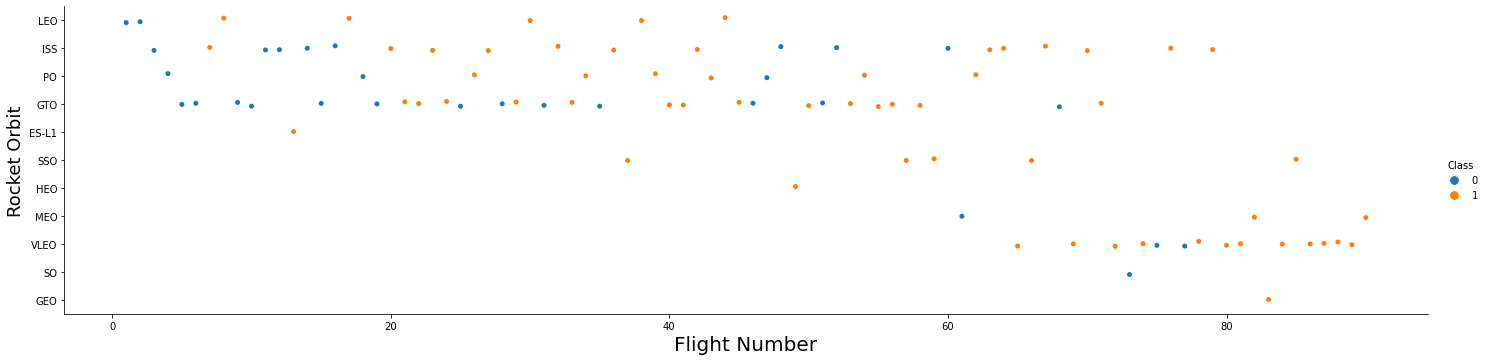

In [53]:
sns.catplot(y="Orbit", x="FlightNumber", hue="Class", data=launch_df, aspect = 4)
plt.xlabel("Flight Number",fontsize=20)
plt.ylabel("Rocket Orbit",fontsize=18)
plt.show()

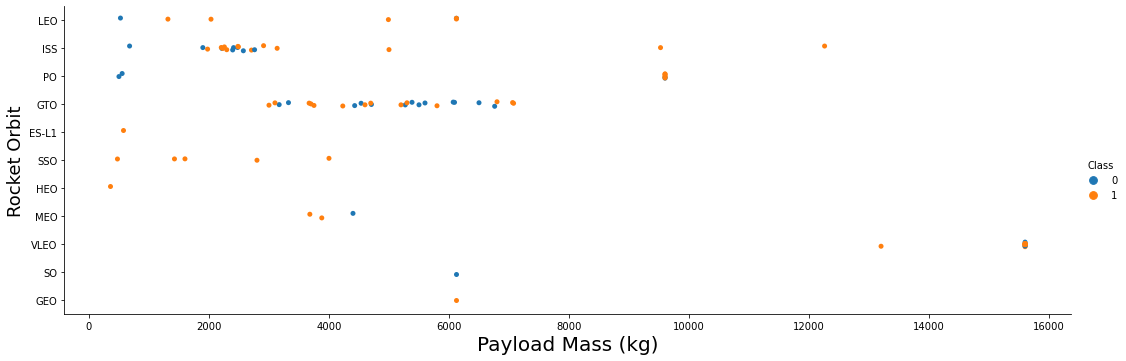

In [54]:
sns.catplot(y="Orbit", x="PayloadMass", hue="Class", data=launch_df, aspect = 3)
plt.xlabel("Payload Mass (kg)",fontsize=20)
plt.ylabel("Rocket Orbit",fontsize=18)
plt.show()

In [55]:
aux = launch_df
aux['Date'] = pd.to_datetime(aux['Date'])
aux['year'], aux['month'] = aux['Date'].dt.year, aux['Date'].dt.month
Year = aux.groupby('year').mean()
Year['year'] = Year.index
Year

,FlightNumber,PayloadMass,Class,month,year
year,,,,,
2010,1.0,6123.547647,0.000000,6.000000,2010
2012,2.0,525.000000,0.000000,5.000000,2012
2013,4.0,1449.000000,0.000000,8.000000,2013
2014,8.5,3019.333333,0.333333,6.333333,2014
2015,14.5,2346.833333,0.333333,4.833333,2015
2016,21.5,3639.125000,0.625000,5.250000,2016
2017,34.5,5366.752647,0.833333,6.833333,2017
2018,52.5,4833.799869,0.611111,6.722222,2018
2019,66.5,7509.370000,0.900000,7.000000,2019


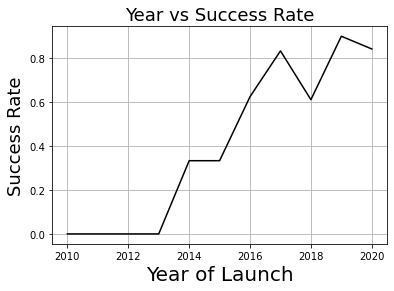

In [56]:
plt.plot(Year['year'],Year["Class"], color='k')
plt.xlabel("Year of Launch",fontsize=20)
plt.ylabel("Success Rate",fontsize=18)
plt.title("Year vs Success Rate",fontsize=18)
plt.grid()
plt.show()

In [57]:
features = launch_df[['FlightNumber', 'PayloadMass', 'Orbit', 'LaunchSite', 'Flights', 'GridFins', 'Reused', 'Legs', 'LandingPad', 'Block', 'ReusedCount', 'Serial']]
features.head()

,FlightNumber,PayloadMass,Orbit,LaunchSite,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial
4,1,6123.547647,LEO,CCSFS SLC 40,1,False,False,False,NaN,1,0,B0003
5,2,525.000000,LEO,CCSFS SLC 40,1,False,False,False,NaN,1,0,B0005
6,3,677.000000,ISS,CCSFS SLC 40,1,False,False,False,NaN,1,0,B0007
7,4,500.000000,PO,VAFB SLC 4E,1,False,False,False,NaN,1,0,B1003
8,5,3170.000000,GTO,CCSFS SLC 40,1,False,False,False,NaN,1,0,B1004


In [58]:
features_one_hot = pd.get_dummies(features[['Orbit', 'LaunchSite', 'LandingPad', 'Serial' ]])

In [59]:
features_one_hot = pd.concat([features, features_one_hot ], axis = 1)
print(features_one_hot.shape)
features_one_hot = features_one_hot.drop(columns=['Orbit', 'LaunchSite', 'LandingPad', 'Serial'])
features_one_hot.head()

(90, 84)


,FlightNumber,PayloadMass,Flights,GridFins,Reused,Legs,Block,ReusedCount,Orbit_ES-L1,Orbit_GEO,Orbit_GTO,Orbit_HEO,Orbit_ISS,Orbit_LEO,Orbit_MEO,Orbit_PO,Orbit_SO,Orbit_SSO,Orbit_VLEO,LaunchSite_CCSFS SLC 40,LaunchSite_KSC LC 39A,LaunchSite_VAFB SLC 4E,LandingPad_5e9e3032383ecb267a34e7c7,LandingPad_5e9e3032383ecb554034e7c9,LandingPad_5e9e3032383ecb6bb234e7ca,LandingPad_5e9e3032383ecb761634e7cb,LandingPad_5e9e3033383ecbb9e534e7cc,Serial_B0003,Serial_B0005,Serial_B0007,Serial_B1003,Serial_B1004,Serial_B1005,Serial_B1006,Serial_B1007,Serial_B1008,Serial_B1010,Serial_B1011,Serial_B1012,Serial_B1013,Serial_B1015,Serial_B1016,Serial_B1017,Serial_B1018,Serial_B1019,Serial_B1020,Serial_B1021,Serial_B1022,Serial_B1023,Serial_B1025,Serial_B1026,Serial_B1028,Serial_B1029,Serial_B1030,Serial_B1031,Serial_B1032,Serial_B1034,Serial_B1035,Serial_B1036,Serial_B1037,Serial_B1038,Serial_B1039,Serial_B1040,Serial_B1041,Serial_B1042,Serial_B1043,Serial_B1044,Serial_B1045,Serial_B1046,Serial_B1047,Serial_B1048,Serial_B1049,Serial_B1050,Serial_B1051,Serial_B1054,Serial_B1056,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062
4,1,6123.547647,1,False,False,False,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,2,525.000000,1,False,False,False,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,3,677.000000,1,False,False,False,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,4,500.000000,1,False,False,False,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,5,3170.000000,1,False,False,False,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [60]:
features_one_hot = features_one_hot.astype('float64')
print(features_one_hot.shape)
features_one_hot.head()

(90, 80)


,FlightNumber,PayloadMass,Flights,GridFins,Reused,Legs,Block,ReusedCount,Orbit_ES-L1,Orbit_GEO,Orbit_GTO,Orbit_HEO,Orbit_ISS,Orbit_LEO,Orbit_MEO,Orbit_PO,Orbit_SO,Orbit_SSO,Orbit_VLEO,LaunchSite_CCSFS SLC 40,LaunchSite_KSC LC 39A,LaunchSite_VAFB SLC 4E,LandingPad_5e9e3032383ecb267a34e7c7,LandingPad_5e9e3032383ecb554034e7c9,LandingPad_5e9e3032383ecb6bb234e7ca,LandingPad_5e9e3032383ecb761634e7cb,LandingPad_5e9e3033383ecbb9e534e7cc,Serial_B0003,Serial_B0005,Serial_B0007,Serial_B1003,Serial_B1004,Serial_B1005,Serial_B1006,Serial_B1007,Serial_B1008,Serial_B1010,Serial_B1011,Serial_B1012,Serial_B1013,Serial_B1015,Serial_B1016,Serial_B1017,Serial_B1018,Serial_B1019,Serial_B1020,Serial_B1021,Serial_B1022,Serial_B1023,Serial_B1025,Serial_B1026,Serial_B1028,Serial_B1029,Serial_B1030,Serial_B1031,Serial_B1032,Serial_B1034,Serial_B1035,Serial_B1036,Serial_B1037,Serial_B1038,Serial_B1039,Serial_B1040,Serial_B1041,Serial_B1042,Serial_B1043,Serial_B1044,Serial_B1045,Serial_B1046,Serial_B1047,Serial_B1048,Serial_B1049,Serial_B1050,Serial_B1051,Serial_B1054,Serial_B1056,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062
4,1.0,6123.547647,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,2.0,525.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,3.0,677.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,4.0,500.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,5.0,3170.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [61]:
!pip3 install folium
!pip3 install wget

     |████████████████████████████████| 95 kB 8.4 MB/s  eta 0:00:01
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9672 sha256=f3f57fa8caa546ffc64a8b61a9700adf7b87f4789776897eb7ba0e361b4d59be
  Stored in directory: /tmp/wsuser/.cache/pip/wheels/04/5f/3e/46cc37c5d698415694d83f607f833f83f0149e49b3af9d0f38
Successfully built wget


In [62]:
import folium
import wget
from folium.plugins import MarkerCluster
from folium.plugins import MousePosition
from folium.features import DivIcon

In [63]:
spacex_df = launch_df[['LaunchSite', 'Latitude', 'Longitude', 'Class']]
launch_sites_df = spacex_df.groupby(['LaunchSite'], as_index=False).first()
launch_sites_df = launch_sites_df[['LaunchSite', 'Latitude', 'Longitude']]
launch_sites_df

,LaunchSite,Latitude,Longitude
0,CCSFS SLC 40,28.561857,-80.577366
1,KSC LC 39A,28.608058,-80.603956
2,VAFB SLC 4E,34.632093,-120.610829


In [176]:
center = [35.08622532828712, -100.20805497441206]
site_map = folium.Map(location=center, zoom_start=5)

In [177]:
CCSFS  = [launch_sites_df['Latitude'].iloc[0],launch_sites_df['Longitude'].iloc[0]]
KSC    = [launch_sites_df['Latitude'].iloc[1],launch_sites_df['Longitude'].iloc[1]]
VAFB   = [launch_sites_df['Latitude'].iloc[2],launch_sites_df['Longitude'].iloc[2]]

In [178]:
folium.Circle(CCSFS, radius=100, color='#000000', fill=True).add_child(folium.Popup('CCSFS SLC 40')).add_to(site_map)
folium.map.Marker(
    CCSFS,
    # Create an icon as a text label
    icon=DivIcon(
        icon_size=(20,20),
        icon_anchor=(0,0),
        html='<div style="font-size: 24; color:#000000;"><b>%s</b></div>' % 'CCSFS',
        )
    ).add_to(site_map)


folium.Circle(KSC, radius=100, color='#000000', fill=True).add_child(folium.Popup('KSC LC 39A')).add_to(site_map)   
folium.map.Marker(
    KSC,
    # Create an icon as a text label
    icon=DivIcon(
        icon_size=(20,20),
        icon_anchor=(0,0),
        html='<div style="font-size: 24; color:#000000;"><b>%s</b></div>' % 'KSC',
        )
    ).add_to(site_map)

folium.Circle(VAFB, radius=100, color='#000000', fill=True).add_child(folium.Popup('VAFB SLC 4E')).add_to(site_map)
folium.map.Marker(
    VAFB,
    # Create an icon as a text label
    icon=DivIcon(
        icon_size=(20,20),
        icon_anchor=(0,0),
        html='<div style="font-size: 24; color:#000000;"><b>%s</b></div>' % 'VAFB',
        )
    ).add_to(site_map)


In [179]:
marker_cluster = MarkerCluster()


In [180]:
marker_color = []
for i in range(spacex_df["Class"].size):
    if spacex_df["Class"].iloc[i] == 0:
        marker_color.append("red")
    else:
        marker_color.append("green")
spacex_df["Marker_color"] = marker_color
spacex_df.head()

/tmp/wsuser/ipykernel_155/255367420.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spacex_df["Marker_color"] = marker_color


,LaunchSite,Latitude,Longitude,Class,Marker_color
4,CCSFS SLC 40,28.561857,-80.577366,0,red
5,CCSFS SLC 40,28.561857,-80.577366,0,red
6,CCSFS SLC 40,28.561857,-80.577366,0,red
7,VAFB SLC 4E,34.632093,-120.610829,0,red
8,CCSFS SLC 40,28.561857,-80.577366,0,red


In [181]:
site_map.add_child(marker_cluster)

for i in range(spacex_df["Class"].size):
    marker = folium.Marker(location=[spacex_df["Latitude"].iloc[i], spacex_df["Longitude"].iloc[i]],
    icon=folium.Icon(color=spacex_df["Marker_color"].iloc[i]))
    marker_cluster.add_child(marker)


In [182]:
formatter = "function(num) {return L.Util.formatNum(num, 5);};"
mouse_position = MousePosition(
    position='topright',
    separator=' Long: ',
    empty_string='NaN',
    lng_first=False,
    num_digits=20,
    prefix='Lat:',
    lat_formatter=formatter,
    lng_formatter=formatter,
)

site_map.add_child(mouse_position)

from math import sin, cos, sqrt, atan2, radians

def calculate_distance(lat1, lon1, lat2, lon2):
    # approximate radius of earth in km
    R = 6373.0

    lat1 = radians(lat1)
    lon1 = radians(lon1)
    lat2 = radians(lat2)
    lon2 = radians(lon2)

    dlon = lon2 - lon1
    dlat = lat2 - lat1

    a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))

    distance = R * c
    return distance

In [183]:
coastline_lat = 28.5621
coastline_lon = -80.56781
rail_lat = 28.57208
rail_lon = -80.58526
rail = [rail_lat,rail_lon]
high_lat = 28.56201
high_lon = -80.57056
high = [high_lat,high_lon]
cape_lat = 28.40181
cape_lon = -80.60467
cape = [cape_lat,cape_lon]
coast = [coastline_lat, coastline_lon]
distance_coastline = calculate_distance(spacex_df["Latitude"].iloc[0], spacex_df["Longitude"].iloc[0], coastline_lat, coastline_lon)
distance1 = calculate_distance(spacex_df["Latitude"].iloc[0], spacex_df["Longitude"].iloc[0], rail_lat, rail_lon)
distance2 = calculate_distance(spacex_df["Latitude"].iloc[0], spacex_df["Longitude"].iloc[0], high_lat, high_lon)
distance3 = calculate_distance(spacex_df["Latitude"].iloc[0], spacex_df["Longitude"].iloc[0], cape_lat, cape_lon)

In [185]:
coor = [coast,CCSFS]
coor1 = [rail,CCSFS]
coor2 =[high,CCSFS]
coor3 =[cape,CCSFS]
distance_marker = folium.Marker(
    coast,
    icon=DivIcon(
        icon_size=(20,20),
        icon_anchor=(0,0),
        html='<div style="font-size: 12; color:#d35400;"><b>%s</b></div>' % "{:10.2f} KM".format(distance_coastline),
        )
    ).add_to(site_map)

distance_marker = folium.Marker(
    rail,
    icon=DivIcon(
        icon_size=(20,20),
        icon_anchor=(0,0),
        html='<div style="font-size: 12; color:#000000;"><b>%s</b></div>' % "{:10.2f} KM".format(distance1),
        )
    ).add_to(site_map)

distance_marker = folium.Marker(
    high,
    icon=DivIcon(
        icon_size=(20,20),
        icon_anchor=(0,0),
        html='<div style="font-size: 12; color:#d35400;"><b>%s</b></div>' % "{:10.2f} KM".format(distance2),
        )
    ).add_to(site_map)

distance_marker = folium.Marker(
    cape,
    icon=DivIcon(
        icon_size=(20,20),
        icon_anchor=(0,0),
        html='<div style="font-size: 12; color:#d35400;"><b>%s</b></div>' % "{:10.2f} KM".format(distance3),
        )
    ).add_to(site_map)


folium.PolyLine(locations=coor, weight=1).add_to(site_map)
folium.PolyLine(locations=coor1, weight=1).add_to(site_map)
folium.PolyLine(locations=coor2, weight=1).add_to(site_map)
folium.PolyLine(locations=coor3, weight=1).add_to(site_map)

site_map